# AIG150 Final Exam - Fall 2024
## Max Marks = *75/75*
## Time Allowed = *60 Minutes*

## Instructions
- You are allowed to bring a reference sheet (A4-both sided).
- Print your name on top of the reference sheet. The sheet **must be submitted with the exam.**
- As a Seneca student, you must conduct yourself in an honest and trustworthy manner in all aspects of your academic career. A dishonest attempt to obtain an academic advantage is considered an offense and will **not** be tolerated by the College.

- Rename the file with the student’s name.
- Once you are done, upload the file on BB **(ONLY ONE SUBMISSION IS ALLOWED)**.
- The exam contains **15** questions in total.
- Each question is worth **5** marks [Total **75** marks].

In [ ]:
# %pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [75]:
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

Download the three csv files from BlackBoard (THREE IN TOTAL):
- customer.csv
- height_weight.csv
- invoice.csv

In [76]:
hw=pd.read_csv('height_weight.csv')
hw

,sex,tv,computer,sleep,height,momheight,dadheight,exercise,gpa
0,Female,13.0,10.0,3.5,66.0,66.0,71.0,10.0,4.00
1,Male,20.0,7.0,9.0,72.0,64.0,65.0,2.0,2.30
2,Male,15.0,15.0,6.0,68.0,62.0,74.0,3.0,2.60
3,Male,8.0,20.0,6.0,68.0,59.0,70.0,6.0,2.80
4,Female,2.5,10.0,5.0,64.0,65.0,70.0,6.5,2.62
...,...,...,...,...,...,...,...,...,...
143,Female,5.0,35.0,5.0,65.0,69.0,72.0,5.0,2.18
144,Male,8.0,32.0,6.0,72.0,65.0,71.0,1.5,2.80
145,Male,9.0,7.0,7.0,75.0,68.0,74.0,7.0,3.50
146,Male,1.0,10.0,5.0,72.0,60.0,74.0,3.0,4.00


# Using dataframe hw, complete questions 1-10.

1. Replace all female occurrences with 'f' and all male occurrences with 'm' under the sex column in the hw dataframe.

In [77]:
hw['sex'] = hw['sex'].replace({'Female': 'f', 'Male': 'm'})
hw.value_counts('sex')

sex
f    81
m    67
Name: count, dtype: int64

2. Add a column named 'tall' to the hw dataframe, that takes the value "1" if height is greater than the height of mom and dad, and '0' otherwise.

In [78]:
hw['tall'] = ((hw['height'] > hw['momheight']) & (hw['height'] > hw['dadheight'])).astype(int)
hw['tall'].value_counts()

tall
0    107
1     41
Name: count, dtype: int64

3. Write the code to show the rows of the hw dataframe where there are outliers for the "sleep" variable.
- Outliers should be considered based on the mean and standard deviation method.
- Any value greater than the mean+2std_dev or lower than mean +2std_dev is considered as outlier.

In [79]:
mean = hw["sleep"].mean()
std_dev = hw["sleep"].std()
outliers = hw[(hw["sleep"] > mean + 2*std_dev) | (hw["sleep"] < mean - 2*std_dev)]
outliers

,sex,tv,computer,sleep,height,momheight,dadheight,exercise,gpa,tall
0,f,13.0,10.0,3.5,66.0,66.0,71.0,10.0,4.00,0
42,m,0.0,30.0,3.5,69.0,63.0,65.0,6.0,3.04,1
46,f,2.0,10.0,11.0,64.0,62.0,68.0,2.0,3.06,0
63,m,10.0,5.0,2.0,66.0,60.0,65.0,1.0,NaN,1
69,m,0.0,10.0,12.0,71.0,64.0,72.0,2.0,1.85,0
95,f,35.0,21.0,10.5,63.0,68.0,75.0,2.5,2.83,0
110,f,1.0,13.5,3.0,62.0,60.0,68.0,3.0,3.90,0


4. For female observations, replace the missing values under the gpa column with the mean gpa for all female observations.

In [80]:
hw.loc[(hw['sex'] == 'f') & (hw['gpa'].isna()), 'gpa'] = hw[hw['sex'] == 'f']['gpa'].mean()
int(hw.loc[(hw['sex'] == 'f') & (hw['gpa'].isna()), 'gpa'].isnull().sum()) # Number of Null Values Left

0

5. Use iloc and slice method to slice the first 4 columns of the dataset, keep all rows.
- Save the sliced subset in a dataframe called subset, then show the first 5 observations of dataframe subset.

In [81]:
subset = hw.iloc[:, 0:4]
subset.head()

,sex,tv,computer,sleep
0,f,13.0,10.0,3.5
1,m,20.0,7.0,9.0
2,m,15.0,15.0,6.0
3,m,8.0,20.0,6.0
4,f,2.5,10.0,5.0


6. Add a new column named "healthy" in the hw dataframe.
- Use a lambda function to fill this column with "1" if number of hours spent on exercise is greater than 5, and "0" otherwise.
- Print the resulting dataframe hw.

In [82]:
hw['healthy'] = hw['exercise'].apply(lambda x: 1 if x > 5 else 0)
hw

,sex,tv,computer,sleep,height,momheight,dadheight,exercise,gpa,tall,healthy
0,f,13.0,10.0,3.5,66.0,66.0,71.0,10.0,4.00,0,1
1,m,20.0,7.0,9.0,72.0,64.0,65.0,2.0,2.30,1,0
2,m,15.0,15.0,6.0,68.0,62.0,74.0,3.0,2.60,0,0
3,m,8.0,20.0,6.0,68.0,59.0,70.0,6.0,2.80,0,1
4,f,2.5,10.0,5.0,64.0,65.0,70.0,6.5,2.62,0,1
...,...,...,...,...,...,...,...,...,...,...,...
143,f,5.0,35.0,5.0,65.0,69.0,72.0,5.0,2.18,0,0
144,m,8.0,32.0,6.0,72.0,65.0,71.0,1.5,2.80,1,0
145,m,9.0,7.0,7.0,75.0,68.0,74.0,7.0,3.50,1,1
146,m,1.0,10.0,5.0,72.0,60.0,74.0,3.0,4.00,0,0


7. Create a histogram to show the frequency of male and female observations.

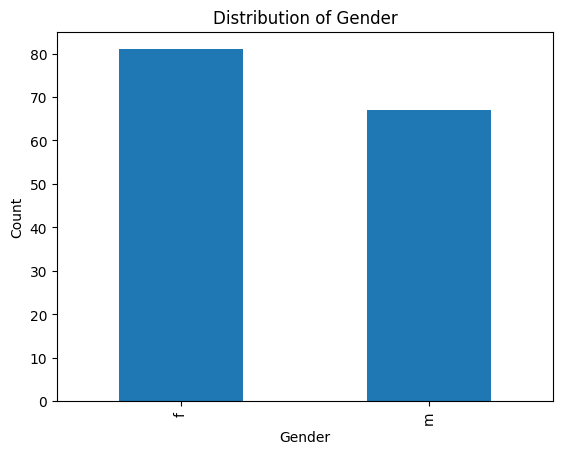

In [83]:
hw['sex'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

8.  Create a new dataframe hw_binned, result of equal-sized binning of all the numerical columns in hw dataset given the percentile points in the quantile table.
- Use a for loop to iterate over the columns in hw dataset, and call qcut for binning each of the columns.

In [84]:
hw_binned_dict = {}
for col in hw.columns:
    if hw[col].dtype in ['float64', 'int64']:
        try:
            hw_binned_dict[col] = pd.qcut(hw[col], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
        except Exception as e:
            # print(f"In Column {col}", e)
            hw_binned_dict[col] = hw[col]
    else:
        # print("The Column {col} isn't a Numeric Datatype.")
        hw_binned_dict[col] = hw[col]
hw_binned = pd.DataFrame(hw_binned_dict)
hw_binned

,sex,tv,computer,sleep,height,momheight,dadheight,exercise,gpa,tall,healthy
0,f,Q4,Q2,Q1,Q2,Q4,Q3,Q4,Q4,0,1
1,m,Q4,Q2,Q4,Q4,Q3,Q1,Q1,Q1,1,0
2,m,Q4,Q3,Q1,Q3,Q2,Q4,Q2,Q2,0,0
3,m,Q3,Q3,Q1,Q3,Q1,Q3,Q3,Q2,0,1
4,f,Q2,Q2,Q1,Q1,Q3,Q3,Q4,Q2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
143,f,Q2,Q4,Q1,Q2,Q4,Q3,Q3,Q1,0,0
144,m,Q3,Q4,Q1,Q4,Q3,Q3,Q1,Q2,1,0
145,m,Q3,Q2,Q2,Q4,Q4,Q4,Q4,Q4,1,1
146,m,Q1,Q2,Q1,Q4,Q1,Q4,Q2,Q4,0,0


9. Calculate the average number of sleep hours for males who have gpa 3 or higher.

In [85]:
high_gpa_males = hw[(hw['sex'] == 'm') & (hw['gpa'] >= 3)]
avg_sleep = high_gpa_males['sleep'].mean()
f'{avg_sleep:.2f}'

'6.59'

10. Create a new function called "total_hours", which return the sum of hours spent on "Tv", "computer" and "sleep".
- Apply the function to hw dataframe and print the total_hours for all observations.

In [86]:
def total_hours(row):
    return row['tv'] + row['computer'] + row['sleep']
hw['total_hours'] = hw.apply(total_hours, axis=1)
hw[['tv', 'computer', 'sleep', 'total_hours']]

,tv,computer,sleep,total_hours
0,13.0,10.0,3.5,26.5
1,20.0,7.0,9.0,36.0
2,15.0,15.0,6.0,36.0
3,8.0,20.0,6.0,34.0
4,2.5,10.0,5.0,17.5
...,...,...,...,...
143,5.0,35.0,5.0,45.0
144,8.0,32.0,6.0,46.0
145,9.0,7.0,7.0,23.0
146,1.0,10.0,5.0,16.0


# Use the invoice and customer dataframes to answer q11-15

In [87]:
customer=pd.read_csv('customer.csv')
customer

,Unnamed: 0,CUS_CODE,CUS_LNAME,CUS_FNAME
0,0,10010,Ramas,Alfred
1,1,10011,Dunne,Leona
2,2,10012,Smith,Kathy
3,3,10013,Olowski,Paul
4,4,10014,Orlando,Myron
5,5,10015,O'Brian,Amy
6,6,10016,Brown,James
7,7,10017,Williams,George
8,8,10018,Farriss,Anne
9,9,10019,Smith,Olette


In [88]:
invoice=pd.read_csv('invoice.csv')
invoice

,Unnamed: 0,INV_NUMBER,CUS_CODE,INV_DATE
0,0,1001,10014,2012-01-16
1,1,1002,10011,2012-01-16
2,2,1003,10012,2012-01-16
3,3,1004,10011,2012-01-17
4,4,1005,10018,2012-01-17
5,5,1006,10014,2012-01-17
6,6,1007,10015,2012-01-17
7,7,1008,10011,2012-01-17


11. Count the number of invoices per customer from the invoice dataframe.

In [89]:
invoice['CUS_CODE'].value_counts()

CUS_CODE
10011    3
10014    2
10012    1
10018    1
10015    1
Name: count, dtype: int64

12. Merge the customer and invoice dataframes and show all matched and unmatched rows from both dataframes.

In [90]:
pd.merge(customer, invoice, on='CUS_CODE', how='outer')

,Unnamed: 0_x,CUS_CODE,CUS_LNAME,CUS_FNAME,Unnamed: 0_y,INV_NUMBER,INV_DATE
0,0,10010,Ramas,Alfred,NaN,NaN,NaN
1,1,10011,Dunne,Leona,1.0,1002.0,2012-01-16
2,1,10011,Dunne,Leona,3.0,1004.0,2012-01-17
3,1,10011,Dunne,Leona,7.0,1008.0,2012-01-17
4,2,10012,Smith,Kathy,2.0,1003.0,2012-01-16
5,3,10013,Olowski,Paul,NaN,NaN,NaN
6,4,10014,Orlando,Myron,0.0,1001.0,2012-01-16
7,4,10014,Orlando,Myron,5.0,1006.0,2012-01-17
8,5,10015,O'Brian,Amy,6.0,1007.0,2012-01-17
9,6,10016,Brown,James,NaN,NaN,NaN


13. Merge the two dataframes customer and invoice into dataframe called customerInvoice using inner join.
- Write customerInvoice data to a customerInvoice.csv file.

In [91]:
customerInvoice = pd.merge(customer, invoice, on='CUS_CODE', how='inner')
customerInvoice.to_csv('customerInvoice.csv', index=False)
customerInvoice

,Unnamed: 0_x,CUS_CODE,CUS_LNAME,CUS_FNAME,Unnamed: 0_y,INV_NUMBER,INV_DATE
0,1,10011,Dunne,Leona,1,1002,2012-01-16
1,1,10011,Dunne,Leona,3,1004,2012-01-17
2,1,10011,Dunne,Leona,7,1008,2012-01-17
3,2,10012,Smith,Kathy,2,1003,2012-01-16
4,4,10014,Orlando,Myron,0,1001,2012-01-16
5,4,10014,Orlando,Myron,5,1006,2012-01-17
6,5,10015,O'Brian,Amy,6,1007,2012-01-17
7,8,10018,Farriss,Anne,4,1005,2012-01-17


14. Group the invoices by customer last name and invoice date.

In [92]:
customerInvoice.groupby(['CUS_LNAME', 'INV_DATE']).size().reset_index(name='count')

,CUS_LNAME,INV_DATE,count
0,Dunne,2012-01-16,1
1,Dunne,2012-01-17,2
2,Farriss,2012-01-17,1
3,O'Brian,2012-01-17,1
4,Orlando,2012-01-16,1
5,Orlando,2012-01-17,1
6,Smith,2012-01-16,1


15. Print the unique values for the column invoice date from the customerInvoice dataframe.

In [93]:
list(customerInvoice['INV_DATE'].unique())

['2012-01-16', '2012-01-17']